## GRUPO 6
##PEDRO GARCÍA SILGO
## JAVIER RODRIGUEZ GARCÍA

# INTRODUCCIÓN AL PROBLEMA
Crea  un  modelo  de  Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar  imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y que ya habéis utilizado para la práctica 1. 
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando (www.zalando.com),  una  tienda  de  moda  online  alemana  especializada  en  ventas  de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución 
(28 x 28 píxeles): 

A continuación se importan todas las librerías necesarias para realizar la Red.


In [ ]:
#Se importan las librerías principales para operar y diseñar la red.
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#Importamos las librerías para diseñar la parte convolucionar
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#Importamos los datos de Minst
from keras.utils.np_utils import to_categorical

from keras import losses
from keras import metrics

2.7.0


También nos garantizamos que tenemos la versión actualizada de Tensor Flow.

A continuación cargamos los datos de Zalando.

In [ ]:
#CARGAMOS EL CONJUNTO DE DATOS DE ZALANDO
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images0, train_labels0), (test_images0, test_labels0) = (train_images, train_labels), (test_images, test_labels)

4431872/4422102 [==============================] - 0s 0us/step


Y a cada una de las imágenes que hemos importado tienen asignada una etiqueta que indica qué prenda de ropa es cada imagen:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

Comprobamos que hemos cargado bien los datos con un ejemplo:

In [ ]:
print(train_images.shape)
# Vemos la matriz de la imagen número 1 (28x28)
print(train_images[5])
print(train_labels[5])

(60000, 28, 28)
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 20

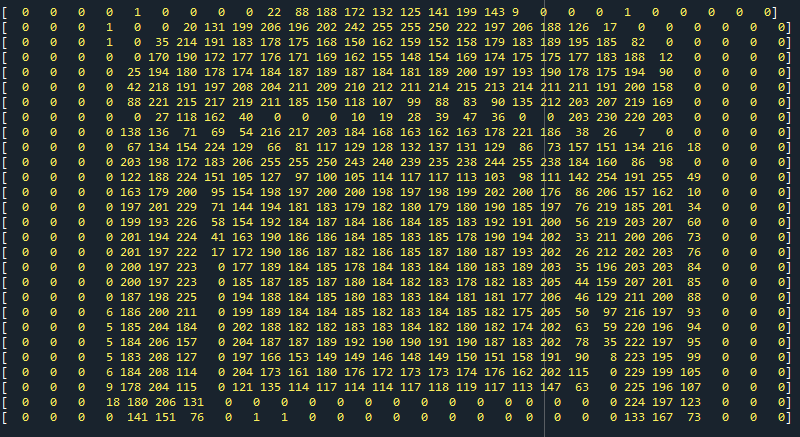

Esta es la primera imagen, lo que parece un jersey. La etiqueta es el 2, osea un jersey.

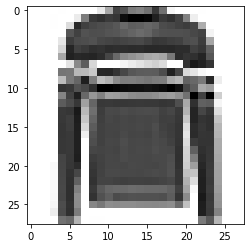

In [ ]:
imagen = train_images[5]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

Esta es una imagen del jersey pintado con matliblob.

A continuación diseñamos las distintas arquitecturas de redes convolucionales para los dististos casos.








#Caso 1


Para el primer caso, la arquitecura queda de esta manera:

##Preparación

In [23]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1), name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Conv2D(64, (5, 5), activation='relu', name='Capa2'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


Antes de seguir, tenemos que "aplanar" los datos a un vector de dimensión 1. Para ello usamos flattern

In [25]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Ahora preparamos las imágenes para la implementación posterior.

In [26]:
print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)


In [27]:
#train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

#test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)


Y por último, entrenamos la red con los datos, pero vamos a ver cuántas épocas poner. Para ello, lo probaremos con parte de los datos de entrenamiento.

##Prueba


In [28]:
entrenaimagen = train_images[:20000]
entrenalabel = train_labels[:20000]
val_imagen = train_images[20000:]
val_label = train_labels[20000:]
print(entrenaimagen.shape)
print(entrenalabel.shape)

(20000, 28, 28)
(20000,)


In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(entrenaimagen, 
                    entrenalabel,
                    batch_size=100,
                    epochs=100,
                    validation_data =(val_imagen, val_label))



Epoch 1/100
200/200 [==============================] - 3s 15ms/step - loss: 2.3024 - accuracy: 0.1075 - val_loss: 2.3024 - val_accuracy: 0.1653
Epoch 2/100
200/200 [==============================] - 3s 13ms/step - loss: 2.3023 - accuracy: 0.1054 - val_loss: 2.3025 - val_accuracy: 0.0983
Epoch 3/100
200/200 [==============================] - 3s 14ms/step - loss: 2.3023 - accuracy: 0.1045 - val_loss: 2.3025 - val_accuracy: 0.0983
Epoch 4/100
200/200 [==============================] - 3s 14ms/step - loss: 2.3023 - accuracy: 0.1034 - val_loss: 2.3025 - val_accuracy: 0.0983
Epoch 5/100
200/200 [==============================] - 3s 13ms/step - loss: 2.3022 - accuracy: 0.1034 - val_loss: 2.3025 - val_accuracy: 0.0983
Epoch 6/100
200/200 [==============================] - 3s 14ms/step - loss: 2.3022 - accuracy: 0.1034 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 7/100
200/200 [==============================] - 3s 14ms/step - loss: 2.3022 - accuracy: 0.1034 - val_loss: 2.3025 - val_accuracy:

In [30]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

[2.30238676071167, 2.302342176437378, 2.3022942543029785, 2.3022592067718506, 2.302245855331421, 2.3022396564483643, 2.302227258682251, 2.3022148609161377, 2.302204132080078, 2.302196741104126, 2.3021602630615234, 2.3021726608276367, 2.3021395206451416, 2.3021440505981445, 2.3021349906921387, 2.302119731903076, 2.3020997047424316, 2.302096366882324, 2.3020801544189453, 2.3020427227020264, 2.30206036567688, 2.3020317554473877, 2.302006721496582, 2.3020012378692627, 2.301950693130493, 2.301980972290039, 2.3019516468048096, 2.3019301891326904, 2.301903247833252, 2.301879405975342, 2.301872968673706, 2.3018484115600586, 2.3018150329589844, 2.301802635192871, 2.301786422729492, 2.301757574081421, 2.3017210960388184, 2.301692247390747, 2.3016674518585205, 2.3016409873962402, 2.3016016483306885, 2.3015799522399902, 2.301544427871704, 2.301513195037842, 2.3014538288116455, 2.3014321327209473, 2.3013932704925537, 2.301339626312256, 2.3013010025024414, 2.30122971534729, 2.3012096881866455, 2.301

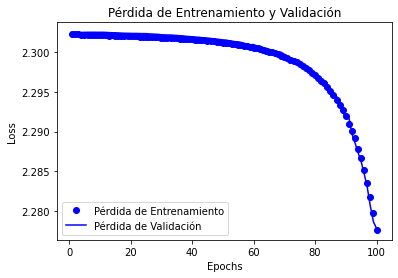

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

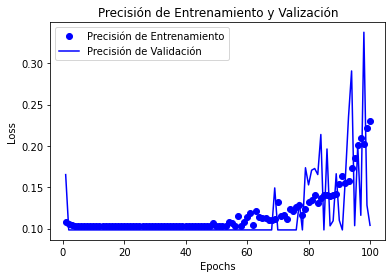

In [32]:
plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 2.2775 - accuracy: 0.1039
Test accuracy: 0.1039000004529953


Acabamos de comprobar qué ocurre si empleamos 50 épocas al entrenamiento con parte de las imagenes de entrenamiento. Hemos visto que a partir de cierta iteración, la mejora de las neuronas baja considerablemente y podría tender a sobreentrenarse. Por lo que bajaremos el número hasta 5 iteraciones.

##Entrenamiento


In [34]:
model.fit(train_images, train_labels,
            batch_size=100,
            epochs=5,
            verbose = 1)

Epoch 1/5
600/600 [==============================] - 4s 7ms/step - loss: 2.2717 - accuracy: 0.2349
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 2.2602 - accuracy: 0.2482
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 2.2451 - accuracy: 0.2475
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 2.2289 - accuracy: 0.2408
Epoch 5/5
600/600 [==============================] - 4s 7ms/step - loss: 2.2144 - accuracy: 0.2440


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Comparando con la primera evaluación, al haber iterado menos, el programa está menos sobreentrenado y resuelve mejor el problema. Por lo que así quedaría la red neuronal del caso 1.

##Apartado 6


(Ponemos este apartado encima del 3 y 4 para que haga la predicción con la red neuronal del caso 1 sin editar por los otros apartados).

Predicción: Ahora se pide hacer predicciones de los datos con las redes formadas

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
print(test_labels.shape)

In [ ]:
i=5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_images[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, test_images[i], test_labels)
plt.show()

Tenemos un error para predecir en el propio algoritmo que se nos da en el enunciado de la práctica y no comprendemos el fallo, por lo que el apartado 6 no lo vamos a poder hacer en el resto de casos.

##Apartado 3.

Para este apartado, emplearemos el caso 1, pero con 25 iteraciones;

In [ ]:
model.fit(train_images, train_labels,
            batch_size=100,
            epochs=25,
            verbose = 1)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

En este caso, la precisión aumenta un poco, pero es como hemos mencionado antes. No vale la pena entrenar de más al sistema para obtener un 1% más de precisión si luego puede que falle con otros datos.

##Apartado 4

Para este caso, cogeremos el caso 1 y pondremos la función de activación de las neuronas el siguiente : tanh

Capa 1:

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1), name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Capa 2

In [ ]:
model.add(Conv2D(64, (5, 5), activation='tanh', name='Capa2'))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [ ]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
            batch_size=100,
            epochs=5,
            verbose = 1)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Al usar esta nueva función de optimización, el aprendizaje empeora (la precisión del test) bastante, por lo que podemos decir que esta no es la función óptima para este problema.

#Caso 2


Para el caso 2, cambiamos la arquitectura de la neurona de esta manera (como las imagenes ya están cargadas del caso anterior, no hace falta volvarlas a preparar):


##Entrenamiento

In [ ]:
model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu', name='Capa2'))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [ ]:
model.add(Flatten())
model.add(Dense(65, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
            batch_size=100,
            epochs=5,
            verbose = 1)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Para el caso 2, la precisión ha bajado en comparación con el caso 1. Esto se debe a que hemos aumentado el número de neuronas en ambas capas, por lo que la matriz de pesos que se genera es mayor y distribuye de distinta manera la información. Además, como hay más neuronas, esa información se "especializa" y pierde generalidad, por lo que cuando se enfrenta el test no está tan capacitado como en el caso 1. 

#Caso 3


Para el caso 3 también cambiaremos la estrctura minimamente con los mismos datos de los casos anteriores:

##Entrenamiento

In [ ]:
model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu', name='Capa2'))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [ ]:
model.add(Flatten())
model.add(Dense(65, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
            batch_size=100,
            epochs=5,
            verbose = 1)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Este caso es prácticamente el mismo que el caso 2, solo que cambia el optimizador de sigmoidea a adam. Este cambio es muy notorio porque la precisión de la red aumenta bastante, por lo que para este caso, el optimizador adam es mucho mejor.